In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

    ДЗ 
1. Для изображения sar_3.jpg найти наиболее протяженный участок 
(выделить линии при помощи преобразования Хафа)
2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

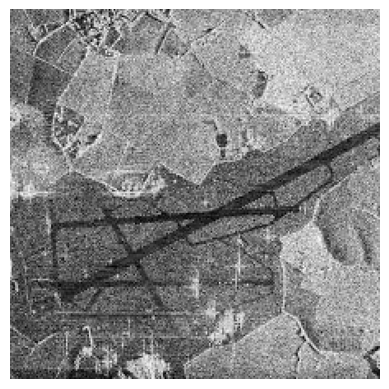

In [2]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.axis('off')

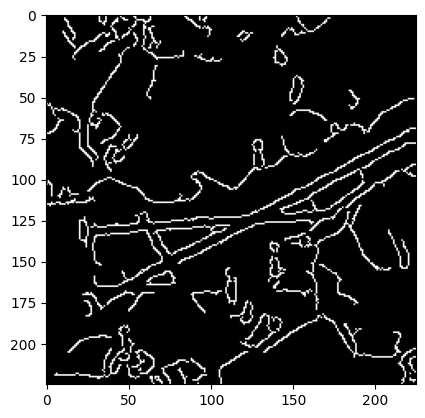

In [3]:
image_gray = cv2.GaussianBlur(image_gray, (9, 9), 2)
canny = cv2.Canny(image_gray,50,100,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 60)
plt.imshow(canny, cmap="gray")

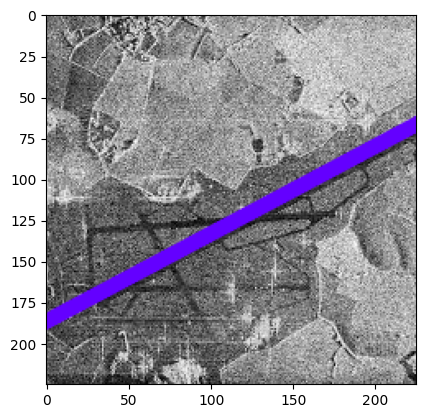

In [4]:
import math 
image_with_lines = image.copy()

if lines is not None:
    longest_line = None
    max_length = 0

    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200*(-b)), int(y0 + 200*(a)))
        pt2 = (int(x0 - 200*(-b)), int(y0 - 200*(a)))
        length = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

        if length > max_length:
            max_length = length
            longest_line = lines[i]
    if longest_line is not None:
        rho = longest_line[0][0]
        theta = longest_line[0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200*(-b)), int(y0 + 200*(a)))
        pt2 = (int(x0 - 200*(-b)), int(y0 - 200*(a)))
        cv2.line(image_with_lines, pt1, pt2, (100, 0, 255), 8, cv2.LINE_AA)

plt.imshow(image_with_lines)

Точечная бинаризация

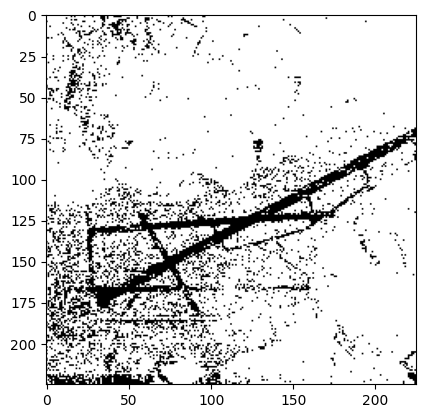

In [5]:
import copy

bin_img = copy.deepcopy(image_gray1)
T = 75
bin_img[image_gray1 < T] = 0
bin_img[image_gray1 >= T] = 255

plt.imshow(bin_img, cmap="gray")

Бинаризация Отсу

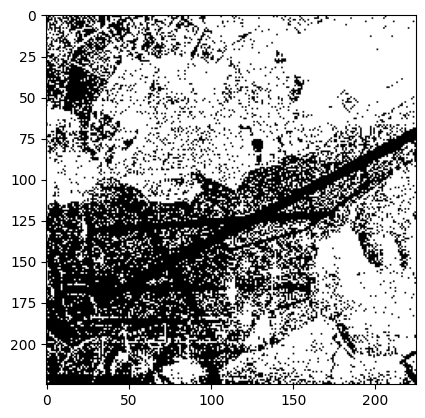

In [6]:
image_contrast = cv2.convertScaleAbs(image_gray1, alpha=1.5, beta=0)
_,th2 = cv2.threshold(image_contrast,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(th2, cmap="gray")

Адаптивная бинаризация

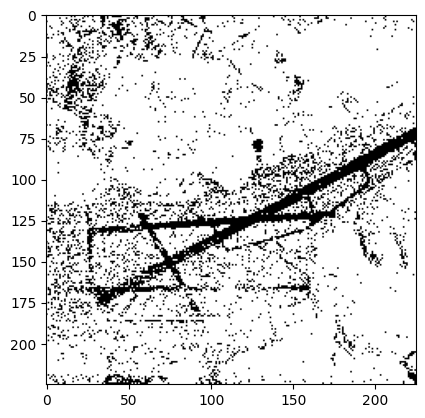

In [7]:
th3 = cv2.adaptiveThreshold(image_gray1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,351,45)

plt.imshow(th3, cmap="gray")

Оператор Собеля

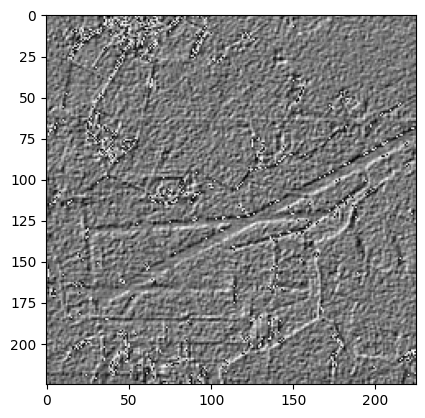

In [8]:
scale = 0.5
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray1, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray1, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)

plt.imshow((grad_x - grad_x.min())*255, cmap="gray")
plt.imshow((grad - grad.min())*255, cmap="gray")

Сравнение

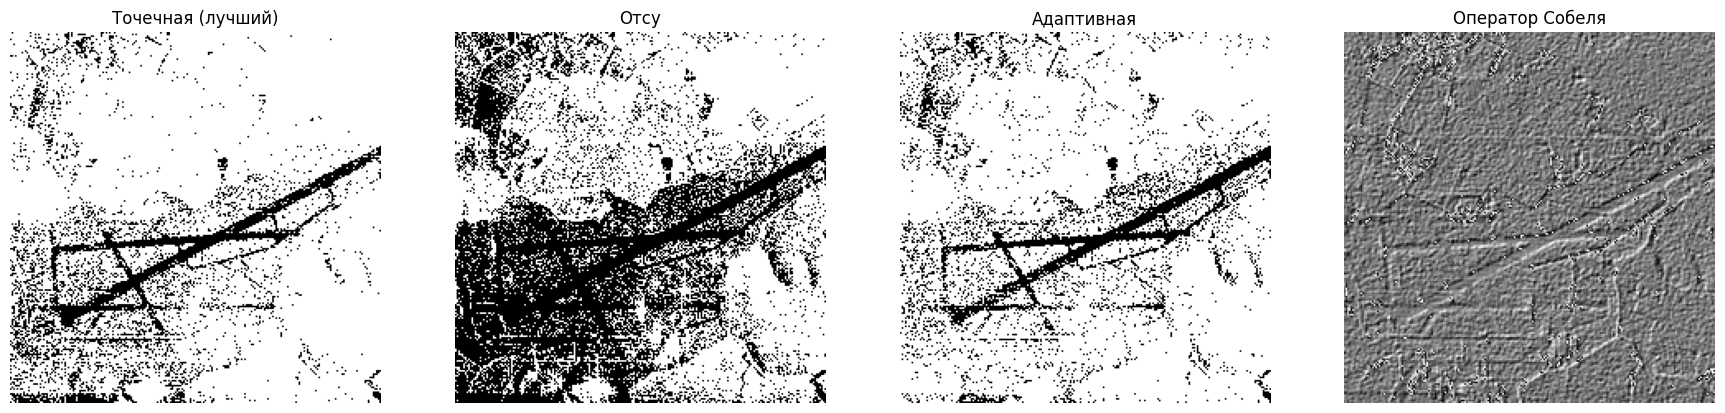

In [9]:
plt.figure(figsize=(22, 6))
plt.subplot(1,4,1)
plt.axis('off')
plt.title('Точечная (лучший)')
plt.imshow(bin_img, cmap="gray")
plt.subplot(1,4,2)
plt.axis('off')
plt.title('Отсу')
plt.imshow(th2, cmap="gray")
plt.subplot(1,4,3)
plt.axis('off')
plt.title('Адаптивная')
plt.imshow(th3, cmap="gray")
plt.subplot(1,4,4)
plt.axis('off')
plt.title('Оператор Собеля')
plt.imshow((grad - grad.min())*255, cmap="gray")